In [ ]:
# Mengimpor library/pustaka yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Membuat variabel untuk menampung dan melakukan pembacaan dataset dengan format csv
df = pd.read_csv('/content/annual-co-emissions-by-region.csv')
df

,Entity,Code,Year,Annual CO2 emissions (zero filled)
0,Afghanistan,AFG,1750,0
1,Afghanistan,AFG,1751,0
2,Afghanistan,AFG,1752,0
3,Afghanistan,AFG,1753,0
4,Afghanistan,AFG,1754,0
...,...,...,...,...
66932,Zimbabwe,ZWE,2016,10737567
66933,Zimbabwe,ZWE,2017,9581633
66934,Zimbabwe,ZWE,2018,11854367
66935,Zimbabwe,ZWE,2019,10949084


In [ ]:
# Hitung total emisi per negara dan tahun
total_emisi_per_negara_tahun = dataset.groupby(['Code', 'Year'])['Annual CO2 emissions (zero filled)'].sum()

# Buat dataframe baru
df_negara_berkontribusi = pd.DataFrame(columns=['Year', 'Country', 'Total Emissions'])

# Looping untuk setiap tahun
for tahun in dataset['Year'].unique():
    # Filter data untuk tahun tertentu
    data_tahun = total_emisi_per_negara_tahun.loc[:, tahun]

    # Urutkan data berdasarkan total emisi pada tahun tertentu
    data_urut = data_tahun.sort_values(ascending=False)

    # Tambahkan data ke dataframe
    df_tahun = pd.DataFrame({'Year': tahun, 'Country': data_urut.index, 'Total Emissions': data_urut.values})
    df_negara_berkontribusi = pd.concat([df_negara_berkontribusi, df_tahun], ignore_index=True)

# Tampilkan dataset hasil identifikasi dan pengurutan
# print(df_negara_berkontribusi)
df_negara_berkontribusi
df_negara_berkontribusi.to_csv('df_negara_berkontribusi.csv', index=False)

In [ ]:
df.head() # Menampilkan data teratas
df.info() # Menampilkan informasi mengenai dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66937 entries, 0 to 66936
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Entity                              66937 non-null  object
 1   Code                                60433 non-null  object
 2   Year                                66937 non-null  int64 
 3   Annual CO2 emissions (zero filled)  66937 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ MB


In [ ]:
print("Statistik Deskriptif Fitur Numerical :") # Menampilkan data statistik numerikal
df.describe()

Statistik Deskriptif Fitur Numerical :


,Year,Annual CO2 emissions (zero filled)
count,66937.000000,6.693700e+04
mean,1885.000000,1.203917e+08
std,78.231013,1.030213e+09
min,1750.000000,0.000000e+00
25%,1817.000000,0.000000e+00
50%,1885.000000,0.000000e+00
75%,1953.000000,1.110879e+06
max,2020.000000,3.670250e+10


In [ ]:
print("Statistik Deskriptif Fitur Categorical :") # Menampilkan data statistik fitur kategorikal
df.describe(exclude=np.number)

Statistik Deskriptif Fitur Categorical :


,Entity,Code
count,66937,60433
unique,247,223
top,Afghanistan,AFG
freq,271,271


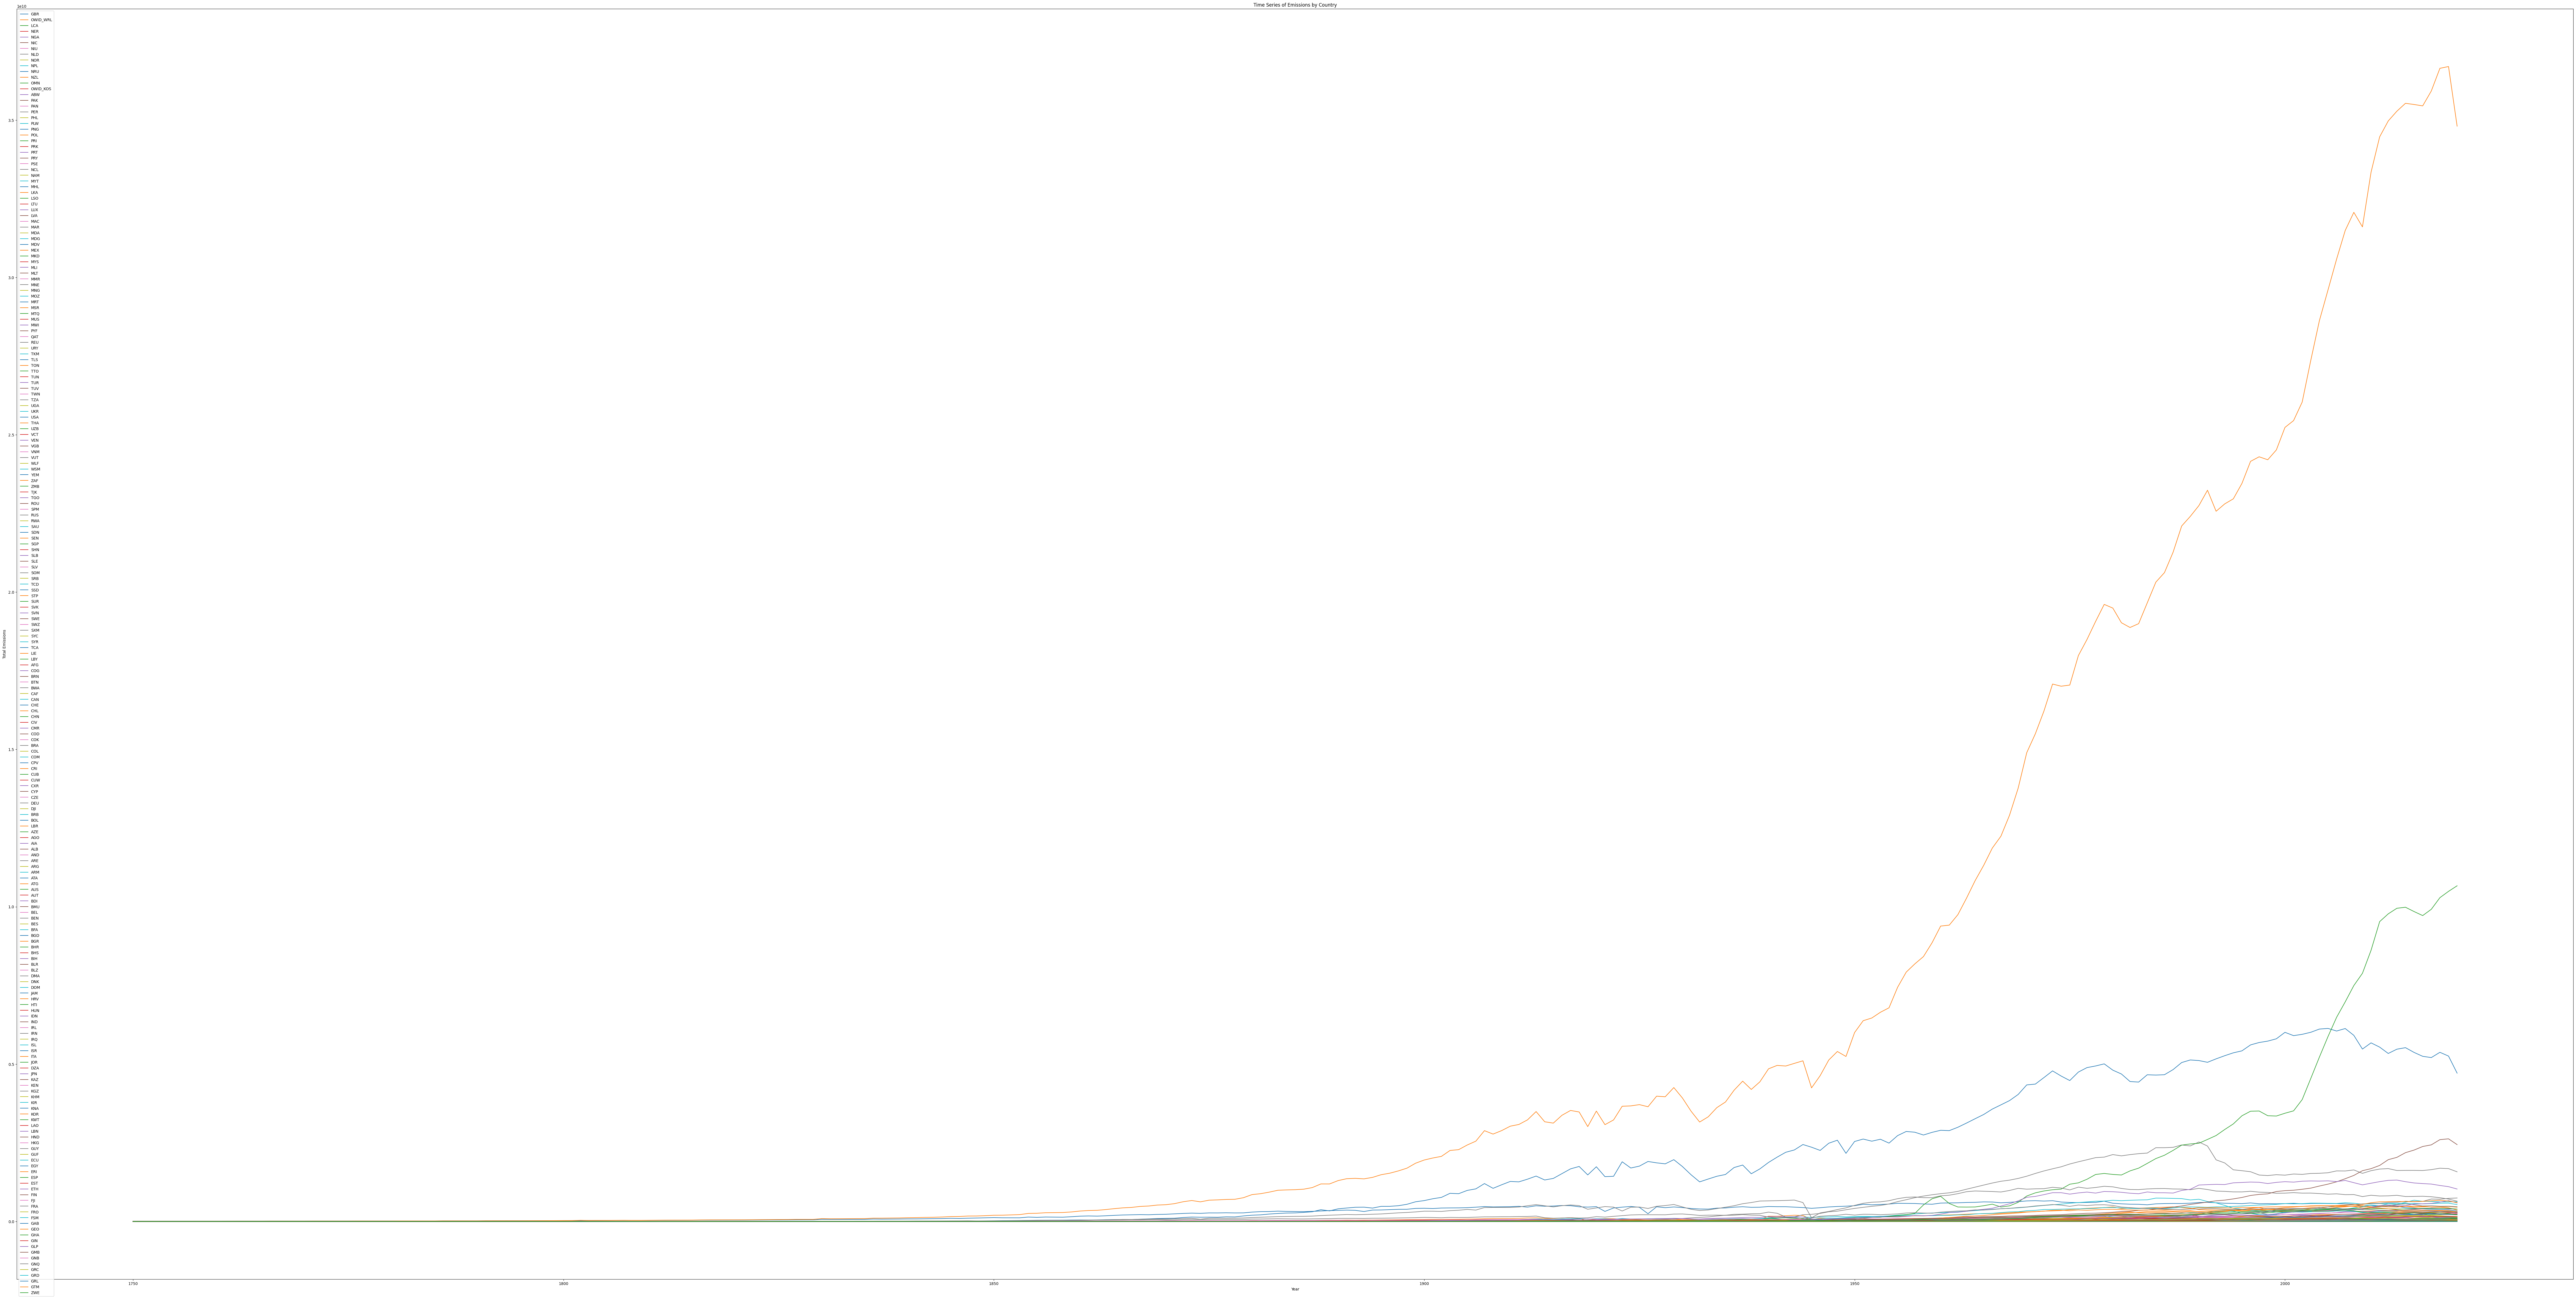

In [ ]:
# Plot time series
fig, ax = plt.subplots(figsize=(120, 60))

# Looping untuk setiap negara dalam dataset terurut
for negara in df_negara_berkontribusi['Country'].unique():
    # Filter data negara
    data_negara = df_negara_berkontribusi[df_negara_berkontribusi['Country'] == negara]

    # Plot time series
    ax.plot(data_negara['Year'], data_negara['Total Emissions'], label=negara)

# Konfigurasi plot
ax.set_xlabel('Year')
ax.set_ylabel('Total Emissions')
ax.set_title('Time Series of Emissions by Country')
ax.legend(loc='upper left')

# Simpan plot sebagai file JPEG
plt.savefig('time_series_plot.jpeg', dpi=300, bbox_inches='tight')

# Tampilkan plot
plt.show()

<ipython-input-64-43da0be2a192>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


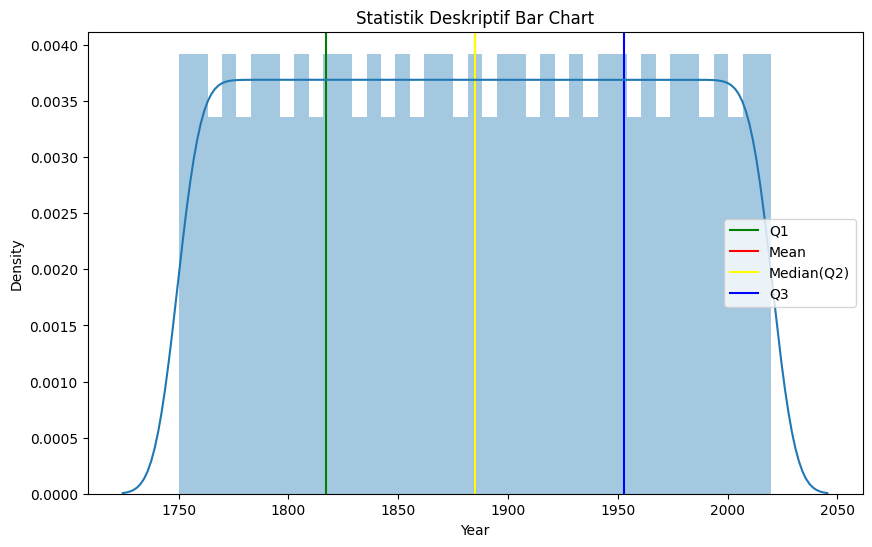

<ipython-input-64-43da0be2a192>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


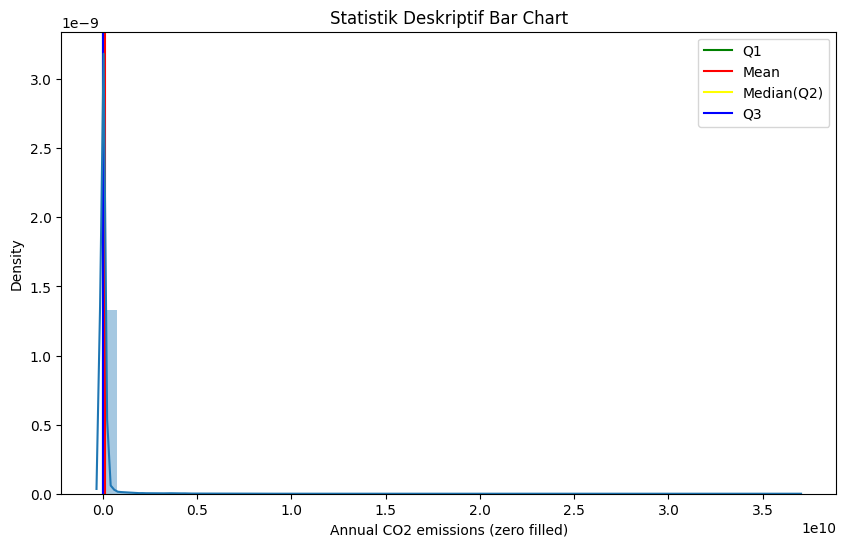

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
  plt.figure(figsize = (10,6))
  plt.axvline(df[column].describe()['25%'], color = 'green', label = 'Q1')
  plt.axvline(df[column].describe()['mean'], color = 'red', label = 'Mean')
  plt.axvline(df[column].describe()['50%'], color = 'yellow', label = 'Median(Q2)')
  plt.axvline(df[column].describe()['75%'], color = 'blue', label = 'Q3')
  sns.distplot(df[column])
  plt.legend()
  plt.title('Statistik Deskriptif Bar Chart')
  plt.show()

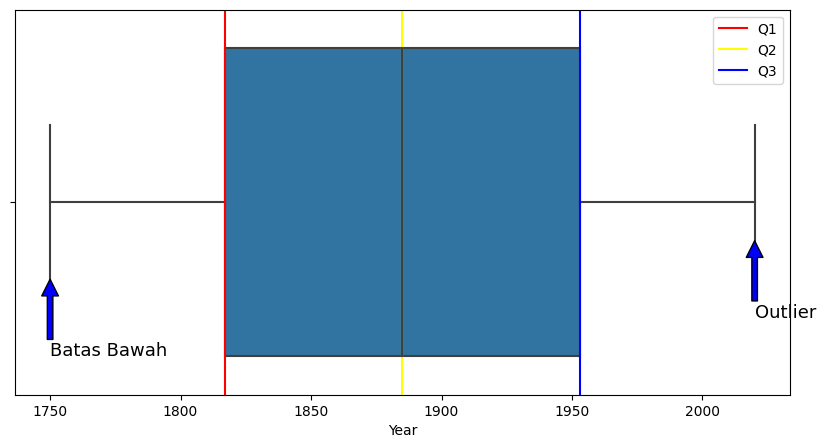

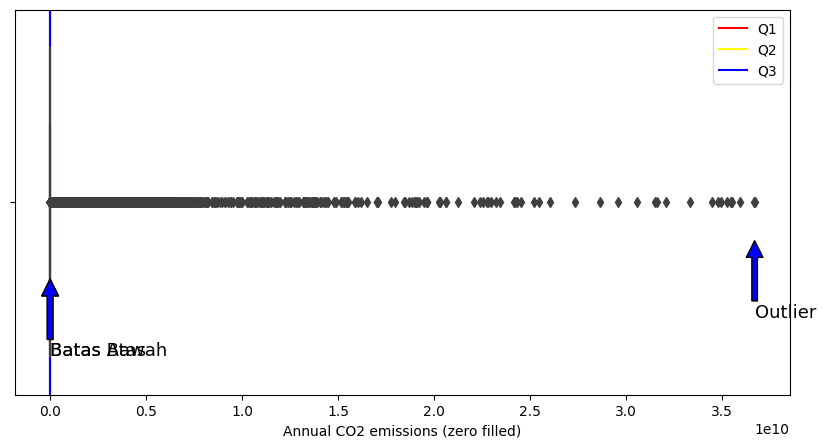

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
  plt.figure(figsize = (10, 5))
  sns.boxplot(x= df[column])
  plt.axvline(df[column].describe()['25%'], color = 'red', label = 'Q1')
  plt.axvline(df[column].describe()['50%'], color = 'yellow', label = 'Q2')
  plt.axvline(df[column].describe()['75%'], color = 'blue', label = 'Q3')
  plt.annotate('Outlier', (df[column].describe()['max'],0.1),
              xytext = (df[column].describe()['max'],0.3), arrowprops = dict(facecolor = 'blue'), fontsize = 13)
  IQR = df[column].describe()['75%'] - df[column].describe()['25%']
  plt.annotate('Batas Atas', (df[column].describe()['75%'] + 1.5*IQR, 0.2),
              xytext = (df[column].describe()['75%'] + 1.5*IQR, 0.4), arrowprops = dict(facecolor = 'blue'), fontsize = 13)
  plt.annotate('Batas Bawah', (df[column].describe()['min'], 0.2),
              xytext = (df[column].describe()['min'], 0.4), arrowprops = dict(facecolor = 'blue'), fontsize = 13)
  plt.legend()